# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url,sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

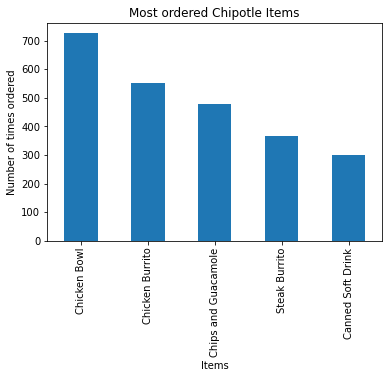

In [37]:
name_series = chipo['item_name']

#counter class to create dict with keys(text) and freq
item_counts = Counter(name_series)

# convert from dict to DF
df = pd.DataFrame.from_dict(item_counts,orient='index')
df = df[0].sort_values(ascending=False)

# bar plot
df[0:5].plot(kind='bar')

# title and labels
plt.xlabel('Items')
plt.ylabel('Number of times ordered')
plt.title('Most ordered Chipotle Items')

# show plt
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [51]:
chipo.head()
chipo['dollar_price'] = [float(val[1:]) for val in chipo['item_price']]
orders = chipo.groupby('order_id').sum()
orders.head()



,quantity,dollar_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


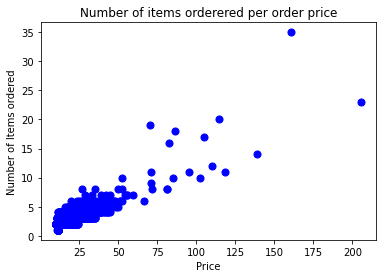

In [52]:
plt.scatter(x=orders['dollar_price'],y = orders['quantity'],s=50,c='blue')

# title and labels
plt.xlabel('Price')
plt.ylabel('Number of Items ordered')
plt.title('Number of items orderered per order price')

# show plt
plt.show()